In [1]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [2]:
listings=pd.read_csv("../source/listings.csv")
listings=listings.drop(['State'],axis=1)
listings["Car"]=listings["Car"].fillna(0)
listings=listings.dropna()
# only keeping past 10 years' worth of listings
listings["SoldDate"]=pd.to_datetime(listings["SoldDate"], format='%Y-%m-%d')
listings=listings.drop(listings[listings["SoldDate"].dt.year<2011].index)

In [3]:
listings=listings.drop_duplicates(keep="first")
listings=listings.reset_index(drop=True)
listings

,Feature,Type,Bath,Bed,Car,Suburb,Postcode,Address,Latitude,Longitude,Floorplan,SoldMethod,SoldDate,SoldPrice
0,['Heating'],ApartmentUnitFlat,1.0,2.0,0.0,MELBOURNE,3000,"514/9 Degraves Street, Melbourne",-37.817764,144.965652,True,SoldByPrivateTreaty,2020-01-01,585000
1,"['Bath', 'Heating']",ApartmentUnitFlat,1.0,1.0,0.0,MELBOURNE,3000,"114/318 Little Bourke Street, Melbourne",-37.812930,144.963100,True,SoldByPrivateTreaty,2020-01-03,380000
2,"['BuiltInWardrobes', 'Intercom', 'Heating', 'D...",ApartmentUnitFlat,1.0,1.0,0.0,MELBOURNE,3000,"605/115 Swanston Street, Melbourne",-37.814995,144.966034,False,SoldByPrivateTreaty,2020-01-06,295000
3,"['SwimmingPool', 'Intercom', 'Heating']",ApartmentUnitFlat,2.0,2.0,0.0,MELBOURNE,3000,"1506/27 Lt Collins Street, Melbourne",-37.812725,144.972626,True,SoldByPrivateTreaty,2020-01-07,596000
4,"['Ensuite', 'SwimmingPool']",ApartmentUnitFlat,2.0,2.0,0.0,MELBOURNE,3000,"53/24-38 Little Bourke Street, Melbourne",-37.810560,144.971512,True,SoldByPrivateTreaty,2020-01-07,587000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283335,"['Ensuite', 'Heating', 'Shed']",House,2.0,4.0,3.0,KOO WEE RUP,3981,"37 Beatties Road, Koo Wee Rup",-38.215157,145.472046,False,SoldByPrivateTreaty,2011-08-08,550000
283336,"['SecureParking', 'Dishwasher']",House,3.0,4.0,2.0,BAYLES,3981,"175 School Road, Bayles",-38.194090,145.576263,False,NotStated,2011-12-12,868000
283337,"['SecureParking', 'Shed']",House,2.0,4.0,2.0,BAYLES,3981,"175 School Road, Bayles",-38.194090,145.576263,False,SoldByPrivateTreaty,2011-12-12,868000
283338,['Heating'],House,1.0,3.0,0.0,PIONEER BAY,3984,"9 Whiting Street, Pioneer Bay",-38.380130,145.546814,False,SoldByPrivateTreaty,2011-07-16,190000


In [3]:
# combine listings with crime stat
crimestat=pd.read_excel('../source/Data_Tables_LGA_Recorded_Offences_Year_Ending_June_2020.xlsx',sheet_name='Table 03')
crimestat.head()

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count
0,2020,June,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B41 Motor vehicle theft,2
1,2020,June,Alpine,3691,Dederang,E Justice procedures offences,E10 Justice procedures,E14 Pervert the course of justice or commit pe...,1
2,2020,June,Alpine,3691,Glen Creek,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1
3,2020,June,Alpine,3691,Glen Creek,C Drug offences,C30 Drug use and possession,C32 Drug possession,1
4,2020,June,Alpine,3691,Glen Creek,F Other offences,F90 Miscellaneous offences,F93 Cruelty to animals,1


In [4]:
crimestat_lga=crimestat.groupby(['Year','Postcode'])[['Offence Count']].sum()
crimestat_lga=crimestat_lga.reset_index(drop=False)
crimestat_lga

,Year,Postcode,Offence Count
0,2011,3000,17550
1,2011,3002,1046
2,2011,3003,787
3,2011,3004,1077
4,2011,3005,158
...,...,...,...
6916,2020,3990,20
6917,2020,3991,53
6918,2020,3992,51
6919,2020,3995,1085


In [5]:
listings["SoldDate"]=pd.to_datetime(listings["SoldDate"],infer_datetime_format=True)
listings["Year"]=listings["SoldDate"].dt.year
listings

,Feature,Type,Bath,Bed,Car,Suburb,Postcode,Address,Latitude,Longitude,Floorplan,SoldMethod,SoldDate,SoldPrice,Year
0,['Heating'],ApartmentUnitFlat,1.0,2.0,0.0,MELBOURNE,3000,"514/9 Degraves Street, Melbourne",-37.817764,144.965652,True,SoldByPrivateTreaty,2020-01-01,585000,2020
1,"['Bath', 'Heating']",ApartmentUnitFlat,1.0,1.0,0.0,MELBOURNE,3000,"114/318 Little Bourke Street, Melbourne",-37.812930,144.963100,True,SoldByPrivateTreaty,2020-01-03,380000,2020
2,"['BuiltInWardrobes', 'Intercom', 'Heating', 'D...",ApartmentUnitFlat,1.0,1.0,0.0,MELBOURNE,3000,"605/115 Swanston Street, Melbourne",-37.814995,144.966034,False,SoldByPrivateTreaty,2020-01-06,295000,2020
3,"['SwimmingPool', 'Intercom', 'Heating']",ApartmentUnitFlat,2.0,2.0,0.0,MELBOURNE,3000,"1506/27 Lt Collins Street, Melbourne",-37.812725,144.972626,True,SoldByPrivateTreaty,2020-01-07,596000,2020
4,"['Ensuite', 'SwimmingPool']",ApartmentUnitFlat,2.0,2.0,0.0,MELBOURNE,3000,"53/24-38 Little Bourke Street, Melbourne",-37.810560,144.971512,True,SoldByPrivateTreaty,2020-01-07,587000,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303594,"['Ensuite', 'Heating', 'Shed']",House,2.0,4.0,3.0,KOO WEE RUP,3981,"37 Beatties Road, Koo Wee Rup",-38.215157,145.472046,False,SoldByPrivateTreaty,2011-08-08,550000,2011
303595,"['SecureParking', 'Dishwasher']",House,3.0,4.0,2.0,BAYLES,3981,"175 School Road, Bayles",-38.194090,145.576263,False,NotStated,2011-12-12,868000,2011
303596,"['SecureParking', 'Shed']",House,2.0,4.0,2.0,BAYLES,3981,"175 School Road, Bayles",-38.194090,145.576263,False,SoldByPrivateTreaty,2011-12-12,868000,2011
303597,['Heating'],House,1.0,3.0,0.0,PIONEER BAY,3984,"9 Whiting Street, Pioneer Bay",-38.380130,145.546814,False,SoldByPrivateTreaty,2011-07-16,190000,2011


In [6]:
# add offence_count
listings=pd.merge(listings,crimestat_lga,on=["Year","Postcode"],how="left")
listings

,Feature,Type,Bath,Bed,Car,Suburb,Postcode,Address,Latitude,Longitude,Floorplan,SoldMethod,SoldDate,SoldPrice,Year,Offence Count
0,['Heating'],ApartmentUnitFlat,1.0,2.0,0.0,MELBOURNE,3000,"514/9 Degraves Street, Melbourne",-37.817764,144.965652,True,SoldByPrivateTreaty,2020-01-01,585000,2020,19557.0
1,"['Bath', 'Heating']",ApartmentUnitFlat,1.0,1.0,0.0,MELBOURNE,3000,"114/318 Little Bourke Street, Melbourne",-37.812930,144.963100,True,SoldByPrivateTreaty,2020-01-03,380000,2020,19557.0
2,"['BuiltInWardrobes', 'Intercom', 'Heating', 'D...",ApartmentUnitFlat,1.0,1.0,0.0,MELBOURNE,3000,"605/115 Swanston Street, Melbourne",-37.814995,144.966034,False,SoldByPrivateTreaty,2020-01-06,295000,2020,19557.0
3,"['SwimmingPool', 'Intercom', 'Heating']",ApartmentUnitFlat,2.0,2.0,0.0,MELBOURNE,3000,"1506/27 Lt Collins Street, Melbourne",-37.812725,144.972626,True,SoldByPrivateTreaty,2020-01-07,596000,2020,19557.0
4,"['Ensuite', 'SwimmingPool']",ApartmentUnitFlat,2.0,2.0,0.0,MELBOURNE,3000,"53/24-38 Little Bourke Street, Melbourne",-37.810560,144.971512,True,SoldByPrivateTreaty,2020-01-07,587000,2020,19557.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303594,"['Ensuite', 'Heating', 'Shed']",House,2.0,4.0,3.0,KOO WEE RUP,3981,"37 Beatties Road, Koo Wee Rup",-38.215157,145.472046,False,SoldByPrivateTreaty,2011-08-08,550000,2011,181.0
303595,"['SecureParking', 'Dishwasher']",House,3.0,4.0,2.0,BAYLES,3981,"175 School Road, Bayles",-38.194090,145.576263,False,NotStated,2011-12-12,868000,2011,181.0
303596,"['SecureParking', 'Shed']",House,2.0,4.0,2.0,BAYLES,3981,"175 School Road, Bayles",-38.194090,145.576263,False,SoldByPrivateTreaty,2011-12-12,868000,2011,181.0
303597,['Heating'],House,1.0,3.0,0.0,PIONEER BAY,3984,"9 Whiting Street, Pioneer Bay",-38.380130,145.546814,False,SoldByPrivateTreaty,2011-07-16,190000,2011,234.0


In [7]:
crimestat_lga=crimestat.groupby(['Postcode','Local Government Area'])[['Offence Count']].sum()
crimestat_lga=crimestat_lga.reset_index(drop=False)
crimestat_lga=crimestat_lga.drop(["Offence Count"],axis=1)
crimestat_lga=crimestat_lga.drop_duplicates(subset=["Postcode"])
crimestat_lga

,Postcode,Local Government Area
0,3000,Melbourne
1,3002,Melbourne
2,3003,Melbourne
3,3004,Melbourne
5,3005,Melbourne
...,...,...
970,3990,Bass Coast
971,3991,Bass Coast
972,3992,Bass Coast
973,3995,Bass Coast


In [8]:
# add LGA
listings=pd.merge(listings,crimestat_lga,on=["Postcode"],how="left")
listings

,Feature,Type,Bath,Bed,Car,Suburb,Postcode,Address,Latitude,Longitude,Floorplan,SoldMethod,SoldDate,SoldPrice,Year,Offence Count,Local Government Area
0,['Heating'],ApartmentUnitFlat,1.0,2.0,0.0,MELBOURNE,3000,"514/9 Degraves Street, Melbourne",-37.817764,144.965652,True,SoldByPrivateTreaty,2020-01-01,585000,2020,19557.0,Melbourne
1,"['Bath', 'Heating']",ApartmentUnitFlat,1.0,1.0,0.0,MELBOURNE,3000,"114/318 Little Bourke Street, Melbourne",-37.812930,144.963100,True,SoldByPrivateTreaty,2020-01-03,380000,2020,19557.0,Melbourne
2,"['BuiltInWardrobes', 'Intercom', 'Heating', 'D...",ApartmentUnitFlat,1.0,1.0,0.0,MELBOURNE,3000,"605/115 Swanston Street, Melbourne",-37.814995,144.966034,False,SoldByPrivateTreaty,2020-01-06,295000,2020,19557.0,Melbourne
3,"['SwimmingPool', 'Intercom', 'Heating']",ApartmentUnitFlat,2.0,2.0,0.0,MELBOURNE,3000,"1506/27 Lt Collins Street, Melbourne",-37.812725,144.972626,True,SoldByPrivateTreaty,2020-01-07,596000,2020,19557.0,Melbourne
4,"['Ensuite', 'SwimmingPool']",ApartmentUnitFlat,2.0,2.0,0.0,MELBOURNE,3000,"53/24-38 Little Bourke Street, Melbourne",-37.810560,144.971512,True,SoldByPrivateTreaty,2020-01-07,587000,2020,19557.0,Melbourne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303594,"['Ensuite', 'Heating', 'Shed']",House,2.0,4.0,3.0,KOO WEE RUP,3981,"37 Beatties Road, Koo Wee Rup",-38.215157,145.472046,False,SoldByPrivateTreaty,2011-08-08,550000,2011,181.0,Baw Baw
303595,"['SecureParking', 'Dishwasher']",House,3.0,4.0,2.0,BAYLES,3981,"175 School Road, Bayles",-38.194090,145.576263,False,NotStated,2011-12-12,868000,2011,181.0,Baw Baw
303596,"['SecureParking', 'Shed']",House,2.0,4.0,2.0,BAYLES,3981,"175 School Road, Bayles",-38.194090,145.576263,False,SoldByPrivateTreaty,2011-12-12,868000,2011,181.0,Baw Baw
303597,['Heating'],House,1.0,3.0,0.0,PIONEER BAY,3984,"9 Whiting Street, Pioneer Bay",-38.380130,145.546814,False,SoldByPrivateTreaty,2011-07-16,190000,2011,234.0,Bass Coast


In [9]:
# get crime rate (per 100,000 population) by LGA
crimerate=pd.read_excel('../source/Data_Tables_LGA_Recorded_Offences_Year_Ending_June_2020.xlsx',sheet_name='Table 01')
crimerate.head()

,Year,Year ending,Police Region,Local Government Area,Offence Count,"Rate per 100,000 population"
0,2020,June,1 North West Metro,Banyule,9700,7327.796800
1,2020,June,1 North West Metro,Brimbank,20242,9629.887060
2,2020,June,1 North West Metro,Darebin,15161,9144.093570
3,2020,June,1 North West Metro,Hobsons Bay,6100,6186.917198
4,2020,June,1 North West Metro,Hume,21529,8917.768536


In [10]:
crimerate=crimerate.dropna()
crimerate=pd.DataFrame(crimerate.groupby(["Year","Local Government Area"])["Rate per 100,000 population"].mean())
crimerate=crimerate.reset_index()
crimerate

,Year,Local Government Area,"Rate per 100,000 population"
0,2011,Alpine,3007.954922
1,2011,Ararat,8140.561540
2,2011,Ballarat,9291.379944
3,2011,Banyule,5343.014888
4,2011,Bass Coast,6721.132537
...,...,...,...
795,2020,Wyndham,6188.310111
796,2020,Yarra,13715.539402
797,2020,Yarra Ranges,5452.463459
798,2020,Yarriambiack,8408.272021


In [11]:
listings["Local Government Area"]=listings["Local Government Area"].str.lstrip()
crimerate["Local Government Area"]=crimerate["Local Government Area"].str.lstrip()

In [12]:
listings=pd.merge(listings,crimerate,on=["Year","Local Government Area"],how="left")
listings

,Feature,Type,Bath,Bed,Car,Suburb,Postcode,Address,Latitude,Longitude,Floorplan,SoldMethod,SoldDate,SoldPrice,Year,Offence Count,Local Government Area,"Rate per 100,000 population"
0,['Heating'],ApartmentUnitFlat,1.0,2.0,0.0,MELBOURNE,3000,"514/9 Degraves Street, Melbourne",-37.817764,144.965652,True,SoldByPrivateTreaty,2020-01-01,585000,2020,19557.0,Melbourne,19054.381437
1,"['Bath', 'Heating']",ApartmentUnitFlat,1.0,1.0,0.0,MELBOURNE,3000,"114/318 Little Bourke Street, Melbourne",-37.812930,144.963100,True,SoldByPrivateTreaty,2020-01-03,380000,2020,19557.0,Melbourne,19054.381437
2,"['BuiltInWardrobes', 'Intercom', 'Heating', 'D...",ApartmentUnitFlat,1.0,1.0,0.0,MELBOURNE,3000,"605/115 Swanston Street, Melbourne",-37.814995,144.966034,False,SoldByPrivateTreaty,2020-01-06,295000,2020,19557.0,Melbourne,19054.381437
3,"['SwimmingPool', 'Intercom', 'Heating']",ApartmentUnitFlat,2.0,2.0,0.0,MELBOURNE,3000,"1506/27 Lt Collins Street, Melbourne",-37.812725,144.972626,True,SoldByPrivateTreaty,2020-01-07,596000,2020,19557.0,Melbourne,19054.381437
4,"['Ensuite', 'SwimmingPool']",ApartmentUnitFlat,2.0,2.0,0.0,MELBOURNE,3000,"53/24-38 Little Bourke Street, Melbourne",-37.810560,144.971512,True,SoldByPrivateTreaty,2020-01-07,587000,2020,19557.0,Melbourne,19054.381437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303594,"['Ensuite', 'Heating', 'Shed']",House,2.0,4.0,3.0,KOO WEE RUP,3981,"37 Beatties Road, Koo Wee Rup",-38.215157,145.472046,False,SoldByPrivateTreaty,2011-08-08,550000,2011,181.0,Baw Baw,4489.617184
303595,"['SecureParking', 'Dishwasher']",House,3.0,4.0,2.0,BAYLES,3981,"175 School Road, Bayles",-38.194090,145.576263,False,NotStated,2011-12-12,868000,2011,181.0,Baw Baw,4489.617184
303596,"['SecureParking', 'Shed']",House,2.0,4.0,2.0,BAYLES,3981,"175 School Road, Bayles",-38.194090,145.576263,False,SoldByPrivateTreaty,2011-12-12,868000,2011,181.0,Baw Baw,4489.617184
303597,['Heating'],House,1.0,3.0,0.0,PIONEER BAY,3984,"9 Whiting Street, Pioneer Bay",-38.380130,145.546814,False,SoldByPrivateTreaty,2011-07-16,190000,2011,234.0,Bass Coast,6721.132537


In [13]:
# still saving file to avoid re-running
listings.to_csv("listings_all.csv",index=False)

In [14]:
listings.describe()

,Bath,Bed,Car,Postcode,Latitude,Longitude,SoldPrice,Year,Offence Count,"Rate per 100,000 population"
count,303599.000000,303599.000000,303599.000000,303599.000000,303599.000000,303599.000000,3.035990e+05,303599.000000,303591.000000,303599.000000
mean,1.661857,3.095613,1.781709,3200.834436,-37.801264,145.015751,8.070739e+05,2015.767921,1811.021127,7750.527846
std,0.701206,1.004310,1.220555,236.806288,0.682331,2.334668,8.049260e+05,2.636112,2077.448741,4604.682752
min,1.000000,1.000000,0.000000,3000.000000,-38.445705,-96.313190,1.000000e+00,2011.000000,2.000000,2923.651386
25%,1.000000,2.000000,1.000000,3060.000000,-37.885063,144.941254,4.650000e+05,2014.000000,723.000000,4931.231711
50%,2.000000,3.000000,2.000000,3132.000000,-37.812775,145.042130,6.400000e+05,2016.000000,1312.000000,6867.066058
75%,2.000000,4.000000,2.000000,3185.000000,-37.743374,145.160110,9.150000e+05,2018.000000,2210.000000,8940.307269
max,25.000000,42.000000,45.000000,3987.000000,52.206470,151.682068,1.234568e+08,2020.000000,22201.000000,29537.110934


In [15]:
listings['Bath'].value_counts()

2.0     144257
1.0     133861
3.0      21501
4.0       2868
5.0        837
6.0        164
7.0         51
8.0         16
10.0        12
9.0         12
12.0         7
15.0         5
16.0         3
20.0         2
13.0         1
25.0         1
21.0         1
Name: Bath, dtype: int64

In [16]:
# removing outliers with less than 100 counts
listings=listings[listings['Bath']<7]

In [17]:
listings['Bed'].value_counts()

3.0     128852
4.0      78908
2.0      62228
5.0      15936
1.0      14821
6.0       2154
7.0        358
8.0        126
9.0         53
10.0        25
12.0        13
11.0         5
14.0         3
15.0         2
20.0         1
13.0         1
19.0         1
17.0         1
Name: Bed, dtype: int64

In [18]:
# removing outliers
listings=listings[listings['Bed']<9]

In [19]:
listings['Car'].value_counts()

2.0     142917
1.0      99946
0.0      22647
3.0      16284
4.0      14230
6.0       2894
5.0       2460
8.0        771
7.0        446
10.0       359
9.0        131
12.0       103
11.0        41
14.0        26
20.0        25
13.0        24
16.0        19
15.0        17
18.0         6
17.0         6
22.0         5
30.0         5
23.0         4
19.0         4
26.0         4
24.0         2
32.0         2
45.0         2
38.0         1
33.0         1
25.0         1
Name: Car, dtype: int64

In [20]:
# removing outliers
listings=listings[listings['Car']<11]

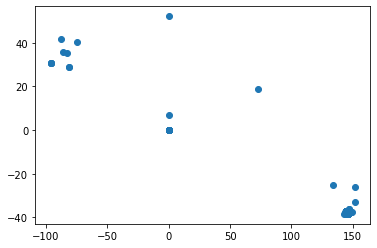

In [21]:
import matplotlib.pyplot as plt
plt.scatter(listings['Longitude'],listings['Latitude'])

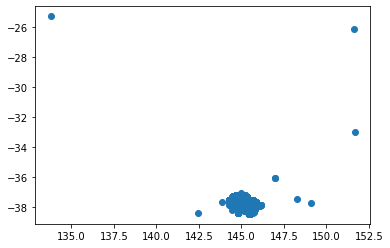

In [22]:
# remove outlier locations
listings=listings[listings['Longitude']>100]
listings=listings[listings['Latitude']<-20]
plt.scatter(listings['Longitude'],listings['Latitude'])

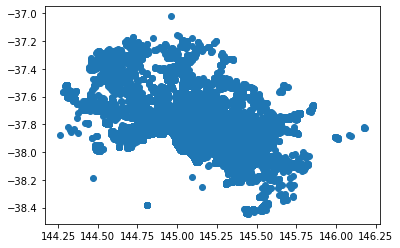

In [25]:
# remove outlier locations
listings=listings[listings['Longitude']>144]
listings=listings[listings['Longitude']<146.5]
listings=listings[listings['Latitude']<-36]
plt.scatter(listings['Longitude'],listings['Latitude'])

In [26]:
listings["Type"].value_counts()

House                215069
ApartmentUnitFlat     63256
Townhouse             24374
NewApartments           314
Name: Type, dtype: int64

In [27]:
# drop property type with too few counts
listings=listings.drop(listings[(listings.Type=="NewApartments")].index)

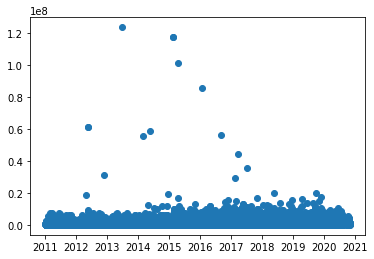

In [28]:
plt.scatter(listings["SoldDate"],listings["SoldPrice"])

In [29]:
listings=listings[listings['SoldPrice']<20000000]
listings=listings[listings["SoldPrice"]>10000]

In [30]:
# save one set of dataset for postgres database
listings.to_csv("../source/clean/listings_all_clean.csv",index=False)

In [31]:
# preparing dataset for machine learning
# split string of 'features' advertised in listings
all_feature=[]
for i in listings['Feature']:
    feature=i.split(",")
    for j in feature:
        j=j.replace("'","")
        j=j.replace("[","")
        j=j.replace("]","")
        j=j.replace(" ","")
        if j.lower() not in all_feature and len(j)>0:
            all_feature.append(j.lower())
all_feature

['heating',
 'bath',
 'builtinwardrobes',
 'intercom',
 'dishwasher',
 'swimmingpool',
 'ensuite',
 'airconditioning',
 'gas',
 'secureparking',
 'furnished',
 'northfacing',
 'gym',
 'cityviews',
 'study',
 'cableorsatellite',
 'floorboards',
 'internallaundry',
 'petsallowed',
 'alarmsystem',
 'broadbandinternetaccess',
 'groundfloor',
 'balconydeck',
 'separatediningroom',
 'waterviews',
 'doubleglazedwindows',
 'tenniscourt',
 'indoorspa',
 'shed',
 'outdoorspa',
 'fullyfenced',
 'solarhotwater',
 'gardencourtyard',
 'rainwaterstoragetank',
 'solarpanels',
 'wallceilinginsulation',
 'energyefficientappliances',
 'waterefficientappliances',
 'waterefficientfixtures',
 'greywatersystem']

In [32]:
# create columns for all features
for i in all_feature:
    listings[i]=0
listings.columns

Index(['Feature', 'Type', 'Bath', 'Bed', 'Car', 'Suburb', 'Postcode',
       'Address', 'Latitude', 'Longitude', 'Floorplan', 'SoldMethod',
       'SoldDate', 'SoldPrice', 'Year', 'Offence Count',
       'Local Government Area', 'Rate per 100,000 population', 'heating',
       'bath', 'builtinwardrobes', 'intercom', 'dishwasher', 'swimmingpool',
       'ensuite', 'airconditioning', 'gas', 'secureparking', 'furnished',
       'northfacing', 'gym', 'cityviews', 'study', 'cableorsatellite',
       'floorboards', 'internallaundry', 'petsallowed', 'alarmsystem',
       'broadbandinternetaccess', 'groundfloor', 'balconydeck',
       'separatediningroom', 'waterviews', 'doubleglazedwindows',
       'tenniscourt', 'indoorspa', 'shed', 'outdoorspa', 'fullyfenced',
       'solarhotwater', 'gardencourtyard', 'rainwaterstoragetank',
       'solarpanels', 'wallceilinginsulation', 'energyefficientappliances',
       'waterefficientappliances', 'waterefficientfixtures',
       'greywatersystem'],
   

In [33]:
# fill features with binary values
for ind,row in listings.iterrows():
    feature=row['Feature'].split(",")
    for j in feature:
        j=j.replace("'","")
        j=j.replace("[","")
        j=j.replace("]","")
        j=j.replace(" ","")
        for i in range(len(all_feature)):
            if j.lower()==all_feature[i]:
                listings.loc[ind,all_feature[i]]=1
listings.head()

,Feature,Type,Bath,Bed,Car,Suburb,Postcode,Address,Latitude,Longitude,...,fullyfenced,solarhotwater,gardencourtyard,rainwaterstoragetank,solarpanels,wallceilinginsulation,energyefficientappliances,waterefficientappliances,waterefficientfixtures,greywatersystem
0,['Heating'],ApartmentUnitFlat,1.0,2.0,0.0,MELBOURNE,3000,"514/9 Degraves Street, Melbourne",-37.817764,144.965652,...,0,0,0,0,0,0,0,0,0,0
1,"['Bath', 'Heating']",ApartmentUnitFlat,1.0,1.0,0.0,MELBOURNE,3000,"114/318 Little Bourke Street, Melbourne",-37.812930,144.963100,...,0,0,0,0,0,0,0,0,0,0
2,"['BuiltInWardrobes', 'Intercom', 'Heating', 'D...",ApartmentUnitFlat,1.0,1.0,0.0,MELBOURNE,3000,"605/115 Swanston Street, Melbourne",-37.814995,144.966034,...,0,0,0,0,0,0,0,0,0,0
3,"['SwimmingPool', 'Intercom', 'Heating']",ApartmentUnitFlat,2.0,2.0,0.0,MELBOURNE,3000,"1506/27 Lt Collins Street, Melbourne",-37.812725,144.972626,...,0,0,0,0,0,0,0,0,0,0
4,"['Ensuite', 'SwimmingPool']",ApartmentUnitFlat,2.0,2.0,0.0,MELBOURNE,3000,"53/24-38 Little Bourke Street, Melbourne",-37.810560,144.971512,...,0,0,0,0,0,0,0,0,0,0


In [35]:
listings_binary=pd.get_dummies(listings, columns=["Type","Suburb","Floorplan","SoldMethod"])
listings_binary=listings_binary.drop(["Feature","Postcode","Address","Local Government Area"],axis=1)
listings_binary=listings_binary.drop(["SoldMethod_NotStated","Floorplan_False"],axis=1)

In [36]:
listings_binary=listings_binary.drop(["Year"],axis=1)
listings_binary["SoldDate"]=pd.to_datetime(listings_binary["SoldDate"],infer_datetime_format=True)
listings_binary=listings_binary.sort_values(by=['SoldDate'])
listings_binary["SoldMonth"]=listings_binary["SoldDate"].dt.month
listings_binary["SoldYear"]=listings_binary["SoldDate"].dt.year
listings_binary["SoldDay"]=listings_binary["SoldDate"].dt.day
listings_binary=listings_binary.drop(['SoldDate'],axis=1)

In [37]:
listings_binary.columns

Index(['Bath', 'Bed', 'Car', 'Latitude', 'Longitude', 'SoldPrice',
       'Offence Count', 'Rate per 100,000 population', 'heating', 'bath',
       ...
       'Suburb_YELLINGBO', 'Suburb_YERING', 'Suburb_YUROKE', 'Floorplan_True',
       'SoldMethod_SoldByAuction', 'SoldMethod_SoldByPrivateTreaty',
       'SoldMethod_SoldPriorToAuction', 'SoldMonth', 'SoldYear', 'SoldDay'],
      dtype='object', length=600)

In [39]:
# save final dataset for machine learning
compression_opts = dict(method='zip',
                        archive_name='listings_all_ml.csv')  
listings_binary.to_csv("../source/clean/listings_all_ml.zip",index=False,compression=compression_opts)